# Data Pre-Processing

#### Import Packages and CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"bank-additional-full.csv")
# Print shape of dataset
print(df.shape)

(39998, 21)


## Data Cleaning

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

#### Check Null Values

In [2]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

In [3]:
features_with_na

[]

* **There are no null values in the dataset**

### 3.2 Other Data Cleaning steps

**Replacing unknown category in feature with most frequent value (mode)**

In [4]:
unknown_columns = ["job", "marital", "education", "default", "housing", "loan"]

for i in unknown_columns:
    mode_value = df[i].mode()[0]  
    df[i] = df[i].replace('unknown', mode_value) 

**Handling Duplicates**

In [5]:
df.duplicated().sum()

14

* **12 Duplicates are found in the dataset**

In [6]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Remove cons_price_idx, euribor3m, nr_employed,day_of_week,loan,default from the dataset as it cannot used in Model Training**

In [9]:
df.drop(columns=['cons_price_idx', 'euribor3m', 'nr_employed','day_of_week','loan','default','housing','pdays','previous'], inplace=True, axis=1)

In [10]:
df.rename(columns={'y':'deposit'},inplace=True)

# Feature Engineering

## Feature Extraction

In [11]:
df.head()

,age,job,marital,education,contact,month,duration,campaign,poutcome,emp_var_rate,cons_conf_idx,deposit
0,56,housemaid,married,basic.4y,telephone,may,261,1,nonexistent,1.1,-36.4,no
1,57,services,married,high.school,telephone,may,149,1,nonexistent,1.1,-36.4,no
2,37,services,married,high.school,telephone,may,226,1,nonexistent,1.1,-36.4,no
3,40,admin.,married,basic.6y,telephone,may,151,1,nonexistent,1.1,-36.4,no
4,56,services,married,high.school,telephone,may,307,1,nonexistent,1.1,-36.4,no


### Type of Features

**Numeric Features**

In [12]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 5


**Categorical Features**

In [13]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 7


**Discrete features**

In [14]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 2


**Continues Features**

In [15]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


### Split X and Y

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “deposit” column.**


In [16]:
X = df.drop('deposit', axis=1)
y = df['deposit']

In [17]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: deposit, dtype: object

**Manual encoding target column**

In [18]:
# If the target column has Denied it is encoded as 1 others as 0
y= np.where(y=='no', 1,0)

In [19]:
y

array([1, 1, 1, ..., 1, 0, 1])

## Feature Transformation

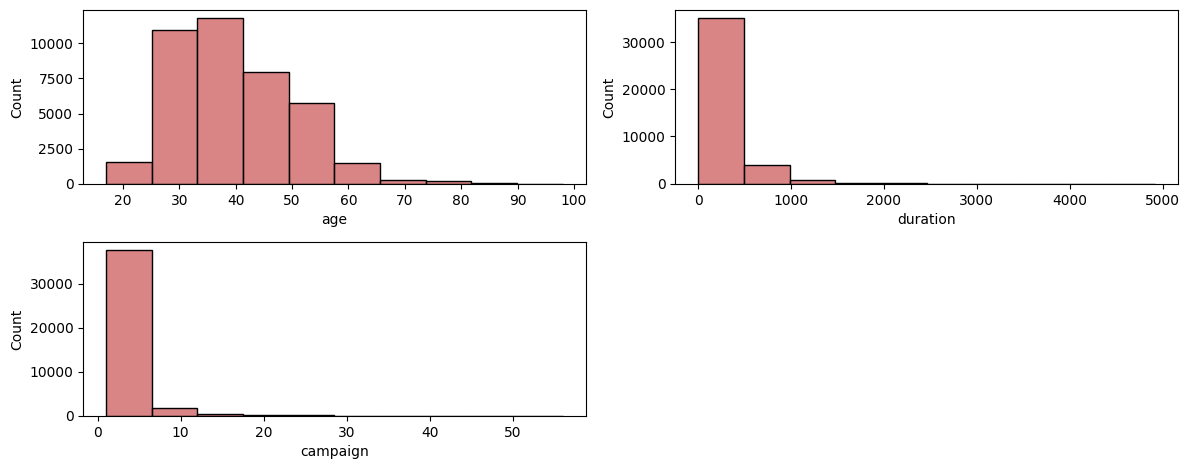

In [20]:
# distribution of data before scaling
plt.figure(figsize=(12, 9))
for i, col in enumerate(['age', 'duration', 'campaign']):
    plt.subplot(4, 2, i+1)
    sns.histplot(x=X[col],bins=10, color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

* No of duration and campaign columns are skewed
* Apply a power transform feature wise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

**Checking Skewness**

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [21]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

age         0.732689
duration    3.257779
campaign    4.731091
dtype: float64

- Positiviely Skewed : duration, campaign.
- We can handle outliers and then check the skewness.

## Apply Power Transformer to Check if it can reduces the outliers

In [22]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['duration', 'campaign']
X_copy = pt.fit_transform(X[transform_features])

In [23]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

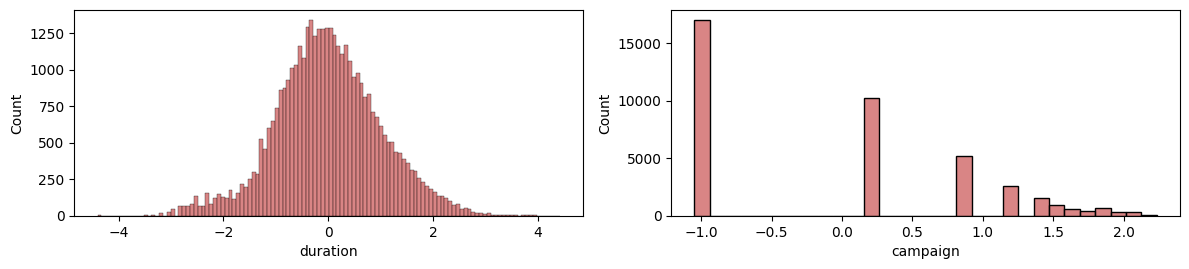

In [24]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

**Checking Skewness**

In [25]:
X_copy.skew(axis=0, skipna=True)

duration    0.013967
campaign    0.265912
dtype: float64

- Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
- So Power Transformer with yeo-johnson can be used.

In [26]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

job : 11
marital : 3
education : 7
contact : 2
month : 10
poutcome : 3
deposit : 2


## Feature Encoding and Scaling

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories** 
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler** 
* Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

**Selecting number features for preprocessing**

In [27]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [28]:
num_features

['age', 'duration', 'campaign', 'emp_var_rate', 'cons_conf_idx']

In [29]:
df.head()

,age,job,marital,education,contact,month,duration,campaign,poutcome,emp_var_rate,cons_conf_idx,deposit
0,56,housemaid,married,basic.4y,telephone,may,261,1,nonexistent,1.1,-36.4,no
1,57,services,married,high.school,telephone,may,149,1,nonexistent,1.1,-36.4,no
2,37,services,married,high.school,telephone,may,226,1,nonexistent,1.1,-36.4,no
3,40,admin.,married,basic.6y,telephone,may,151,1,nonexistent,1.1,-36.4,no
4,56,services,married,high.school,telephone,may,307,1,nonexistent,1.1,-36.4,no


### **Preprocessing using Column Transformer**

In [30]:
# Create Column Transformer with 3 types of transformers
or_columns = ['education','month','poutcome']
oh_columns = ['job','contact','marital']
transform_columns= ['duration','campaign']

# Define the ordinal categories directly as lists
ordinal_categories = [
    ['illiterate','basic.4y','basic.6y','basic.9y','high.school','university.degree','professional.course'],  # 7 categories for education
    ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],  # 10 categories for month
    ['success','nonexistent','failure']  # 3 categories for poutcome
]

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [31]:
X = preprocessor.fit_transform(X)

In [32]:
X

array([[ 0.        ,  0.        ,  0.        , ..., -0.56716716,
         0.61977244,  0.88205631],
       [ 0.        ,  0.        ,  0.        , ..., -0.56716716,
         0.61977244,  0.88205631],
       [ 0.        ,  0.        ,  0.        , ..., -0.56716716,
         0.61977244,  0.88205631],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.56716716,
        -1.16075827,  0.14367438],
       [ 0.        ,  0.        ,  0.        , ..., -0.56716716,
        -1.16075827,  0.14367438],
       [ 1.        ,  0.        ,  0.        , ...,  0.14749349,
        -1.16075827,  0.14367438]])

# Classification

In [33]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

## Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [34]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((51979, 26), (12995, 26))

In [35]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [36]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [37]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [38]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## Model Training 

In [39]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9829
- F1 score: 0.9817
- Precision: 0.9920
- Recall: 0.9717
- Roc Auc Score: 0.9823


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9709
- F1 score: 0.9692
- Precision: 0.9688
- Recall: 0.9697
- Roc Auc Score: 0.9708


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9629
- F1 score: 0.9602
- Precision: 0.9725
- Recall: 0.9481
- Roc Auc Score: 0.9621
----------------------------------
Model performance for Test set
- Accuracy: 0.9631
- F1 score: 0.9605
- Precision: 0.9723
- Recall: 0.9490
- Roc Auc Score: 0.9624


Logistic Regression
Model performance for Training 

**Results of All Models**

In [40]:
base_model_report

,Model Name,Accuracy
4,K-Neighbors Classifier,0.987380
6,CatBoosting Classifier,0.983763
0,Random Forest,0.982917
5,XGBClassifier,0.982763
1,Decision Tree,0.970912
2,Gradient Boosting,0.963140
8,AdaBoost Classifier,0.956522
7,Support Vector Classifier,0.954598
3,Logistic Regression,0.924586


**Here we can use Random Forest , CatBoost and KNN for Hyper Parameter Tuning**

**Define the parameter distribution for Random forest , CatBoost and KNN**

In [41]:
#Initialize few parameter for Hyperparamter tuning
catboost_params = {
    'depth':range(4,10,2),
    'min_data_in_leaf':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [42]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('CatBoost', CatBoostClassifier(verbose=False), catboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

**Create a function for model training and report which can be used in hyperparameter tuning loop**

In [43]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for CatBoost -------------------
{'min_data_in_leaf': 1, 'depth': 8}
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 10}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


In [44]:
model_param

{'CatBoost': {'min_data_in_leaf': 1, 'depth': 8},
 'RF': {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 10},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

## Retraining the Model with best Parameters

In [45]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "CatClassifier": CatBoostClassifier(**model_param['CatBoost'],thread_count=-1,verbose=False),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9693
- F1 score: 0.9669
- Precision: 0.9835
- Recall: 0.9508
- Roc Auc Score: 0.9683
----------------------------------
Model performance for Test set
- Accuracy: 0.9669
- F1 score: 0.9644
- Precision: 0.9823
- Recall: 0.9471
- Roc Auc Score: 0.9659


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9935
- F1 score: 0.9931
- Precision: 0.9984
- Recall: 0.9880
- Roc Auc Score: 0.9932


CatClassifier
Model performance for Training set
- Accuracy: 0.9969
- F1 score: 0.9968
- Precision: 0.9967
- Recall: 0.9968
- Roc Auc Score: 0.9969
----------------------------------
Model performance for Test set
- Accuracy: 0.9854
- F1 score: 0.9845
- Precision: 0.9869
- Recall: 0.9821
- Roc Auc Score: 0.9852




In [46]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.993536
2,CatClassifier,0.985379
0,Random Forest Classifier,0.966910


In [47]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9935
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6853
           1       1.00      0.99      0.99      6142

    accuracy                           0.99     12995
   macro avg       0.99      0.99      0.99     12995
weighted avg       0.99      0.99      0.99     12995



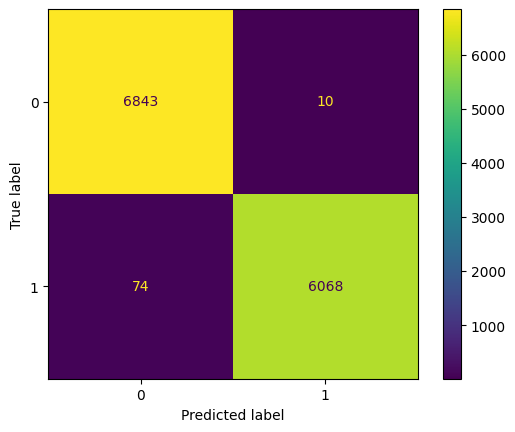

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best Model is K-Nearest Neighbor(KNN) with Accuracy 99.35%